<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basit-Dogrusal-Regresyon" data-toc-modified-id="Basit-Dogrusal-Regresyon-1">Basit Dogrusal Regresyon</a></span><ul class="toc-item"><li><span><a href="#Statsmodels-ile-Modelleme" data-toc-modified-id="Statsmodels-ile-Modelleme-1.1">Statsmodels ile Modelleme</a></span></li><li><span><a href="#Scikit-Learn-ile-Modelleme" data-toc-modified-id="Scikit-Learn-ile-Modelleme-1.2">Scikit-Learn ile Modelleme</a></span></li><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-1.3">Tahmin</a></span></li><li><span><a href="#Artıklar-ve-Makine-Öğrenmesindeki-Önemi" data-toc-modified-id="Artıklar-ve-Makine-Öğrenmesindeki-Önemi-1.4">Artıklar ve Makine Öğrenmesindeki Önemi</a></span></li></ul></li><li><span><a href="#Çoklu-Doğrusal-Regresyon" data-toc-modified-id="Çoklu-Doğrusal-Regresyon-2">Çoklu Doğrusal Regresyon</a></span><ul class="toc-item"><li><span><a href="#Statmodels" data-toc-modified-id="Statmodels-2.1">Statmodels</a></span></li><li><span><a href="#Scikit-Learn--Model" data-toc-modified-id="Scikit-Learn--Model-2.2">Scikit-Learn  Model</a></span></li><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-2.3">Tahmin</a></span></li><li><span><a href="#Model-Tuning-/-Model-Doğrulama" data-toc-modified-id="Model-Tuning-/-Model-Doğrulama-2.4">Model Tuning / Model Doğrulama</a></span></li></ul></li><li><span><a href="#PCR-Model" data-toc-modified-id="PCR-Model-3">PCR Model</a></span><ul class="toc-item"><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-3.1">Tahmin</a></span></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-3.2">Model Tuning</a></span></li></ul></li><li><span><a href="#PLS" data-toc-modified-id="PLS-4">PLS</a></span><ul class="toc-item"><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-4.1">Tahmin</a></span></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-4.2">Model Tuning</a></span></li></ul></li><li><span><a href="#Ridge-Regresyon" data-toc-modified-id="Ridge-Regresyon-5">Ridge Regresyon</a></span><ul class="toc-item"><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-5.1">Tahmin</a></span></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-5.2">Model Tuning</a></span></li></ul></li><li><span><a href="#Losso-Regression" data-toc-modified-id="Losso-Regression-6">Losso Regression</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-6.1">Model</a></span></li><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-6.2">Tahmin</a></span></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-6.3">Model Tuning</a></span></li></ul></li><li><span><a href="#ElasticNet-Regression" data-toc-modified-id="ElasticNet-Regression-7">ElasticNet Regression</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-7.1">Model</a></span></li><li><span><a href="#Tahmin" data-toc-modified-id="Tahmin-7.2">Tahmin</a></span></li><li><span><a href="#Model_Tuning" data-toc-modified-id="Model_Tuning-7.3">Model_Tuning</a></span></li></ul></li></ul></div>

# Basit Dogrusal Regresyon

Temel amac , bagimli ve bagimsiz degisken arasindaki iliskiyi ifade eden dogrusal fonsiyonu bulmaktir.

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4]) # index i degisken olarak aldigi icin usecols
                                                      # #df = df.iloc[:,1:len(df)] ile de bu sorun cozulebilirdi
df=ad.copy()

In [2]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any() # Eksik Deger Var mi ??

False

In [6]:
df.corr() # Kolerasyonlarina bakalim.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


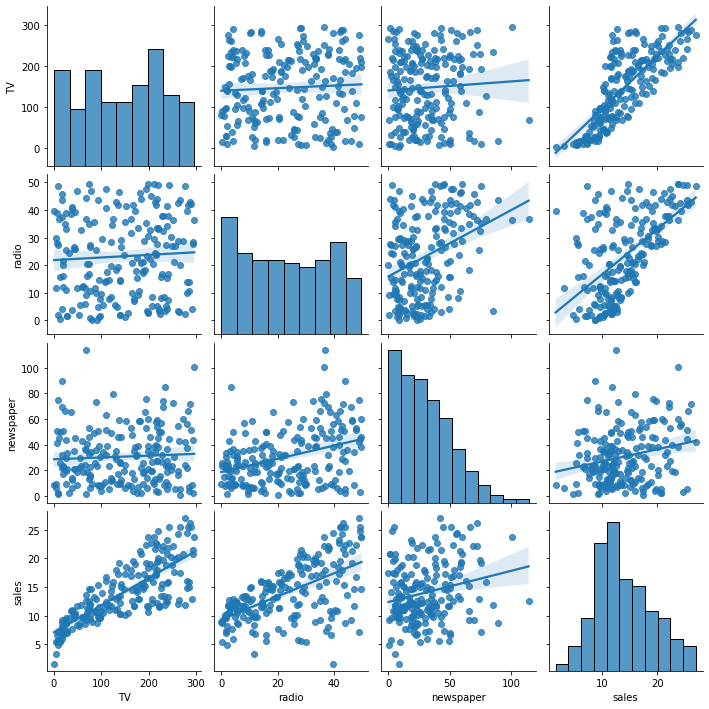

In [7]:
import seaborn as sns
sns.pairplot(df,kind="reg")

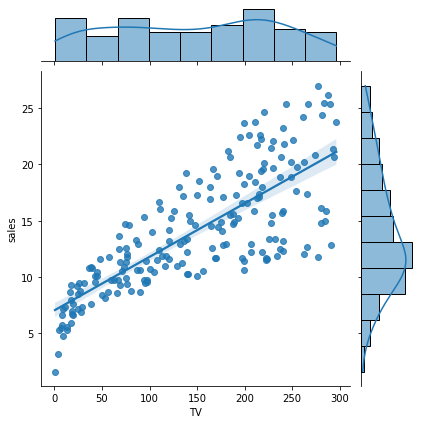

In [8]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

## Statsmodels ile Modelleme

In [9]:
import statsmodels.api as sm

X = df[["TV"]]
X[0:5]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
X = sm.add_constant(X) # Matris islemleri yapilabilmesi icin
X

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8
...,...,...
195,1.0,38.2
196,1.0,94.2
197,1.0,177.0
198,1.0,283.6


In [11]:
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [12]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [13]:
lm = sm.OLS(y,X) # Lineer model. y bagimsiz degiskenimiz , ile X Bagimli degiskeni

In [14]:
model = lm.fit() # Gercek modeli fit ediyoruz

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        12:42:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [17]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [18]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [20]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [21]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [22]:
model.mse_model

3314.6181668686486

In [23]:
model.rsquared # R2 degeri

0.611875050850071

In [24]:
model.fittedvalues[0:5] # Modelin tahmin ettigi degerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [25]:
y[0:5] # Gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
# Modelimiz matematiksel bir fonksiyon uretiyor . Bu modelin denklemi??
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


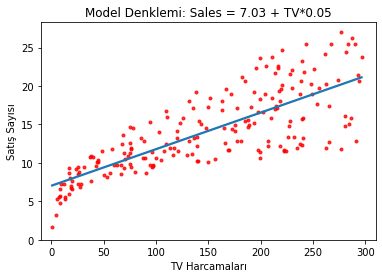

In [27]:
# Modelin Gorsel hali

g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Scikit-Learn ile Modelleme

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

7.032593549127695
[0.04753664]


In [30]:
model.score(X,y)

0.611875050850071

In [31]:
 model.predict(X)[0:10] # Tahmin edilen degerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model Denklemi : 

Sales = 7.03 + TV*0.05

30 Birim TV Harcamasi Oldugunda tahmini deger ne olur?

In [32]:
7.03 + 30 * 0.05

8.530000000000001

In [33]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [34]:
model.predict([[30]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [35]:
yeni_veri = [[5],[90],[200]] # Farkli degerler icin ic ice liste halinde yollanabilir

In [36]:
model.predict(yeni_veri)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [39]:
mse = mean_squared_error(y,model.fittedvalues)
mse

10.512652915656753

In [40]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546883

In [41]:
reg.predict(X)[0:10] # Tahmin degerleri

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [42]:
y[0:10] # Gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [43]:
karsilastirma_tablosu = pd.DataFrame({"Gercek_y": y[0:10],
                                     "Tahmin_y": reg.predict(X)[0:10]})

In [44]:
karsilastirma_tablosu

,Gercek_y,Tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [45]:
karsilastirma_tablosu["Hata"]=karsilastirma_tablosu.Gercek_y - karsilastirma_tablosu.Tahmin_y

In [46]:
karsilastirma_tablosu

,Gercek_y,Tahmin_y,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [47]:
model.resid # Modelin artiklari

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

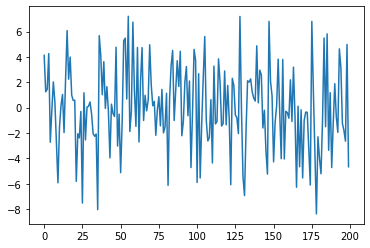

In [48]:
plt.plot(model.resid) # Haalarin Gorsellestirilmesi

# Çoklu Doğrusal Regresyon

Temel amac , bagimli ve bagimsiz degiskenler arasindaki iliskiyi ifade eden dogrusal fonk. bulmaktir.

In [49]:
import pandas as pd
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [50]:
X = df.drop("sales",axis=1)
X[0:10] # Bagimsiz degiskenlerimizi X de topladik

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [51]:
y=df["sales"] # bagimsiz degiskenimiz
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state = 42)
# test_size = 0.20 argumani testte verinin % 20 lik bolumunu al demek
# Random statade ile seed atmis oluyoruz

In [54]:
X_test[0:10]

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [55]:
X_train.shape

(160, 3)

In [56]:
y_train.shape

(160,)

In [57]:
X_test.shape

(40, 3)

In [58]:
y_test.shape

(40,)

In [59]:
traning = df.copy() # Verinin bolunmemis hali

## Statmodels

In [60]:
lm = sm.OLS(y_train,X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                   1.28e-137
Time:                        12:42:52   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__F Statistic degeri modelin anlamliligini , R^2 degeri modelin aciklanabilirliligini anlatir.__

## Scikit-Learn  Model

In [61]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [62]:
model.intercept_ # Sabit katsayi 

2.979067338122629

In [63]:
model.coef_ # bagimsiz degiskenlerin Katsayilari

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin 
Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?





In [64]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [65]:
model.predict(yeni_veri)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [66]:
# Traindeki hatamiz
import numpy as np
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [67]:
rmse

1.644727765644337

In [68]:
# Testteki hatamiz
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test))) 

## Model Tuning / Model Doğrulama

In [69]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=122)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [70]:
# Traindeki hatamiz (valide edilmemis)
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse

1.5039879433929004

In [71]:
model.score(X_train,y_train)

0.9183677917725344

Random State her farkli girildiginde rmse ve model score'u muz degismekte,

__Cross Validation__ ile bu problem giderilebilir

In [72]:
cross_val_score(model, X, y, cv=10,scoring="r2") # Veri seti icin

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [73]:
cross_val_score(model, X, y, cv=10,scoring="r2").mean()  # model scrolarimizin ort.

0.8853562237979616

In [74]:
cross_val_score(model, X_train, y_train, cv=10,scoring="r2") # Train icin capraz valide skorlarimiz

array([0.9244265 , 0.83843073, 0.93883979, 0.80180983, 0.94446525,
       0.9265248 , 0.96544291, 0.88391881, 0.86848148, 0.87473574])

In [75]:
model.score(X_train,y_train)

0.9183677917725344

In [76]:
cross_val_score(model, X_train, y_train, cv=10,scoring="r2").mean() # Valide edilmis skorumuz farkli.Ama daha dogru

0.8967075843268274

In [77]:
#valide edilmis mse' lar , verinin 10 farkli yerinden alinarak elde edilmis sonuclar.
-cross_val_score(model,
                 X_train,
                 y_train,
                 cv=10,
                 scoring="neg_mean_squared_error") 

array([2.46451979, 3.7425439 , 1.36118741, 2.54493981, 1.39697437,
       3.09594371, 1.10841326, 4.11587154, 2.08078744, 2.56865613])

In [78]:
# Valide edilms rmse ;

np.sqrt(-cross_val_score(model,
                 X_train,
                 y_train,
                 cv=10,
                 scoring="neg_mean_squared_error") )

array([1.56987891, 1.93456556, 1.16669937, 1.59528675, 1.1819367 ,
       1.7595294 , 1.05281207, 2.02876109, 1.44249348, 1.60270276])

# PCR Model
- Principal component regression (Temel Bilesen Regresyonu).   
Degiskenlere Boyut Indirgenme Uygulandiktan sonra cikan bilesenlere regresyon modeli uygulanmasi fikrine dayanir

In [79]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [82]:
# Kategorik degiskenleri dummy degisken formatina donusturelim
# One hot encoding donusumu
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [83]:
y = df.Salary # bagimli degisken

In [84]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [85]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [86]:
# PCR Model Kurulumu

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=42)

In [88]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [89]:
# Scikit-learn PCR in R da oldugu sekilde uygulamasi olmadigi icin pca islemi gerceklestirecegiz .
# Sonra Pca uzerine regression modeli oturtup PCR uygulamasi gerceklestirmis olacagiz.
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA() # Degisken sayisi kadar bilesen olusturma islemi.

In [90]:
X_reduced_traning = pca.fit_transform(scale(X_train)) # Donusturme islemi

In [91]:
# Degisken sayisi kadar bilesen olusturuldu , aralarindaki baglanti problemi indirgenmis (kalkmis) veri setimiz oldu

In [92]:
X_reduced_traning[0:1,:] # 1. bilesen tum gozlemler

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [93]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10] 
# Bilesen sayisi arttikca veri setinin aciklanabilirligi artiyor.

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [94]:
lm = LinearRegression()

In [95]:
pcr_model = lm.fit(X_reduced_traning,y_train)

In [96]:
pcr_model.intercept_ # sabitimiz

543.4834416243655

In [97]:
pcr_model.coef_ # 19 katsayi

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [98]:
# 19 degisken varken boyutunu indirgedik , indirgenen boyut uzerinden dogrusal regresyon fit ettik.

## Tahmin

In [99]:
y_pred = pcr_model.predict(X_reduced_traning)
y_pred[0:20] # Tahmin edilen degerler

array([ 377.44484744,  802.19452124,  495.60987745,  112.53177731,
        426.21613066, 1004.23596416,  154.72971833,  362.56259753,
        485.37668246,  918.71501904, 1620.99526026,  818.02993072,
        920.95533578,  739.3382572 ,  645.87882395,  707.06456901,
       1140.22353689,   39.54286417,  214.23266234,  406.95301037])

In [100]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
rmse

289.3292825564976

In [101]:
df["Salary"].mean()

535.9258821292775

In [102]:
r_2 = r2_score(y_train,y_pred)
r_2

0.5770075250410179

In [103]:
pca2 = PCA()

In [104]:
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)

In [105]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

405.15753641499634

## Model Tuning

In [106]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_traning[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [107]:
from sklearn import model_selection

In [108]:
# 10 katli cross valid.
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [109]:
lm = LinearRegression()

In [110]:
rmse = []

In [111]:
# Her bir bilesen sayisi icin k katli cross validation uyguluycak , Daha sonra hangi bilesen sayisinin daha az hatali oldugunu gormus olacagiz
for i in np.arange(1, X_reduced_traning.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_traning[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    rmse.append(score)

In [112]:
rmse[0:10]

[339.00500170955814,
 335.47280320819533,
 335.2590543755473,
 335.7884270015904,
 331.09740630173496,
 329.0340331060009,
 328.1936807391624,
 331.45547584184226,
 333.67757478496605,
 339.503303868483]

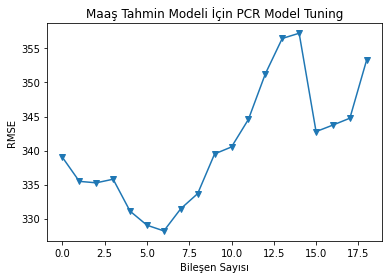

In [113]:
# En optimum parametreyi bulalim
plt.plot(rmse, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [114]:
lm = LinearRegression()

In [115]:
pcr_model = lm.fit(X_reduced_traning[:,0:6],y_train) # En optumim parametre  ile pcr modelimiz

In [116]:
y_pred = pcr_model.predict(X_reduced_traning[:,0:6]) # En opt. paratre ile Tahmin edilen degereler

In [117]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

308.82659830945016

In [118]:
# Test icin 
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


# PLS 
- Partial least squares regression(En Kucuk kareler Regresyonu).   

Degiskenlerin daha az sayida ve aralarinda coklu dogrusal  baglanti problemi olmayan bilesenlere indirgenip regresyon modeli kurulmasi fikrine dayanir

- Cok boyutluluk laneti p > n
- Coklu dogrusal baglanti problemi
- PLS de PCR gibi bagimsiz degiskenlerin dogrusal kombinasyonlarini bulur.Bu Dogrusal kombinasyonlar bilesen veya latent degisken olarak adlandirilir 
- PLS NIPALS'in ozel halidir.Iteratif olarak bagimli degisken ile yuksek kolerasyona sahip degiskenler arasindaki gizli (latent) iliskiyi bulmaya calisir.

__PCR VS PLS__   
- __PCR__ da dogrusal kombinasyonlar ,yani bilesenler bagimsiz degisken uzagindaki degiskenligi maksimum duzeyde ozetleyecek sekilde olusturulur.(Bu durum bagimli degiskeni aciklama yetenegi olmamasina sebep olmakta.)
- __PLS__ ise bilesenler bagimli degisken ile olan __kovaryansi__ maksimum derecede ozetleyecek sekilde olusturur.
- Degiskenler atilmak istenmiyorsa , ve aciklanabilirlik araniyorsa : __PLS__
- __PLS__ gozetimli boyut indirgeme proseduru , __PCR__ gozetimsiz boyut indirgeme proseduru olarak gorulebilir.
- Iki yonteminde bir tuning parametresi vardir.o da bilesen sayisidir.
- Optumum Bilesen sayisini belirlemek icin Cross Validation yontemi kullanilir.






In [119]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
from sklearn.cross_decomposition import PLSRegression , PLSSVD

In [121]:
pls_model = PLSRegression().fit(X_train,y_train)

In [122]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

__Modelin bilesen sayisi kadar katsayi var__

In [123]:
pls_model = PLSRegression(n_components=7).fit(X_train,y_train) # 7 Bilesene indirgedik
pls_model.coef_

array([[-180.55850979],
       [ 253.09672953],
       [  43.13652826],
       [  14.46436819],
       [ -37.83415815],
       [  73.48478386],
       [ -42.38082306],
       [ -13.34333672],
       [ 105.4201188 ],
       [  37.87909657],
       [ 129.9271019 ],
       [  84.13120026],
       [ -95.11391505],
       [  77.63554618],
       [  42.74775243],
       [ -31.98591512],
       [  93.23274158],
       [ -61.08344377],
       [ -64.64983526]])

Hala Bilesen sayisi kadar katsayi var.   

Cunku yeni gozlemin bagimsiz degisken degerleri modele gonderdirildiginde yukaridaki katsayilarin bir kombinasyon degerine tabi tutulup yine tahmin hesaplanmis oluyor

## Tahmin 

In [130]:
y_pred = pls_model.predict(X_train) # traindeki tahminlerimiz
y_pred[0:10]

array([[384.04697006],
       [854.24991591],
       [555.16697855],
       [140.09656259],
       [410.0482048 ],
       [999.04817082],
       [195.53861208],
       [318.78747554],
       [570.92329656],
       [962.42443481]])

In [131]:
# Traindeki hatalarimiz.
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

In [132]:
rmse

295.30483920224185

In [133]:
r2_score(y_train,y_pred)

0.559354855640114

In [134]:
y_pred = pls_model.predict(X_test) # testteki tahminlerimiz

In [135]:
r2_score(y_test,y_pred)

0.399704281063047

## Model Tuning

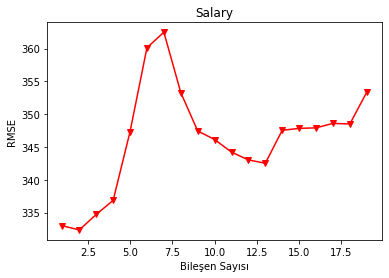

In [144]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [145]:
# 2 bilesende en az hata gozukuyor. Final modeli kuralim

In [146]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [147]:
y_pred = pls_model.predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [149]:
r2_score(y_test,y_pred)

0.2678940112232917

# Ridge Regresyon

- Amac hata kareler toplamini minimize eden katsayilari, bu katsayilara bir ceza uygulayarak bulmaktir.
- Asiri Ogrenmeye karsi direncli.
- Yanlidir fakat Varyansi dusuktur.
- Cok Fazla parametre oldugunda __EKK__ ya gore daha iyidir
- Cok boyutluluk lanetine cozum sunar.
- Tum degiskenler ile model kurar ilgisiz degiskenleri modelden cikartmaz . katsayilarini 0 a Yaklastirir.
- λ (lamda) icin iyi bir deger bulunmasi onemlidir.Bunun icin __CV__ yontemi kullanilir.

In [150]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [151]:
from sklearn.linear_model import Ridge

In [152]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [153]:
ridge_model

Ridge(alpha=0.1)

In [154]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [155]:
ridge_model.intercept_

-4.578626905723013

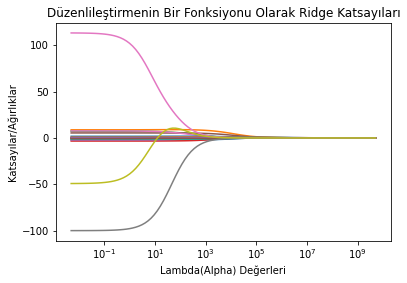

In [156]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Tahmin

In [157]:
y_pred = ridge_model.predict(X_test)
y_pred

array([ 612.05084734,  695.55070977, 1013.29368664,  410.07360115,
        415.45972637,  342.98463743,  661.05771112,  446.736255  ,
        912.33596685,  645.00485451,  686.16114892,  887.8468876 ,
        224.6572569 ,  443.09934783,  265.72100572,  506.75991986,
        805.11742238,   42.77022223, 1236.60742663,  317.43905148,
        427.27485576,  745.3196889 ,  571.74551315,  650.77106329,
        619.32330433,  201.88331799,  897.89629948,  252.64169047,
        428.50988316,   82.65493884,  143.84199242,  128.82215557,
        372.94869728,  462.69437621,  273.79600811,  253.39442039,
       1325.69533764,  105.11839263,  134.68089785,  244.8800595 ,
         52.58867779,  299.21627776,  585.29052254,  399.80806977,
        764.53279675,  675.70525767,  358.51903107,  246.39265924,
        252.55124532,  667.45403674,  753.22289418,  321.47085988,
        772.97674426,  186.76814955,  280.28571668,  592.84036294,
        668.56385917,  809.18520565,  159.01452537, 1166.23019

In [158]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.0517922282844

In [159]:
r2_score(y_test,y_pred)

0.411084490506761

## Model Tuning

In [160]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [161]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

__Hangi Lambda daha iyi?? - CV__

In [162]:
from sklearn.linear_model import RidgeCV

In [163]:
ridge_cv = RidgeCV(alphas=lambdalar ,
                   scoring = "neg_mean_squared_error",
                   normalize=True)

In [164]:
ridge_cv.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [165]:
ridge_cv.alpha_ # Optimum lambda degeri

0.7599555414764666

In [166]:
# Final Model 
ridge_tuned = Ridge(alpha=ridge_cv.alpha_,
                   normalize=True).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [167]:
y_pred = ridge_tuned.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(y_test,y_pred))

386.6826429756415

# Losso Regression
- Amac hata kareler toplamini minimize eden katsayilari, bu katsayilara bir ceza uygulayarak bulmaktir.
- Ridge regressionun ilgili , ilgisiz tum degiskenleri  modelde birakma dezavantajini gidermek icin onerilmistir.
- Losso da katsayilari 0'a yaklastirir.
- Fakat L1 normu λ yeteri kadar buyuk oldugunda bazi katsayilari 0 yapar.Boylece degisken secimi yapmis olur.
- λ'nin dogru secilmesi cok onemlidir burada __CV__ kullanilir.
- Ridge ve Losso yontemleri birbirinden ustun degillerdir.

__λ Ayar parametresinin belirlenmesi__  
λ'nin 0 ldugu yer EKK dir. HKT'ni minimium yapan λ'yi ariyoruz.λ icin belirli degerleri iceren bir kume secilir ve her birisi icin __CV__ test hatasi hesaplanir.En Kucuk __CV__ 'u veren lamda ayar parametresi olarak secilir.Son olarak secilen λ ile model yeniden fit edilir.



## Model

In [169]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [170]:
from sklearn.linear_model import Lasso

In [171]:
lasso_model = Lasso(alpha =0.1).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [172]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.248e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.248e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Text(0, 0.5, 'weights')

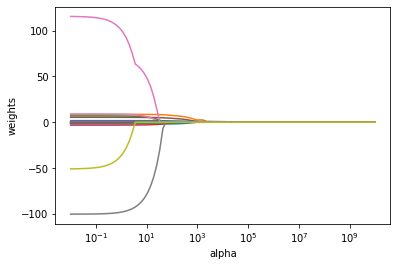

In [173]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin

In [175]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [176]:
np.sqrt(mean_squared_error(y_test,y_pred))

386.6826429756415

## Model Tuning

In [177]:
from sklearn.linear_model import LassoCV

In [178]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [179]:
lasso_cv_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [180]:
lasso_cv_model.alpha_

0.39406126432470073

In [183]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [184]:
lasso_tuned.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.253e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [185]:
y_pred= lasso_tuned.predict(X_test)

In [186]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5226376958366

# ElasticNet Regression
__Amac hata kareler toplamini minimize eden katsayilari bu katsayilara ceza uygulayarak bulmaktir. ElasticNet L1 ve L2 yaklasimlarini birlestirir__

## Model

In [188]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [189]:
from sklearn.linear_model import ElasticNet

In [190]:
enet_model = ElasticNet().fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [191]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [192]:
enet_model.intercept_

-6.465955602112331

## Tahmin

In [194]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [195]:
y_pred = (enet_model.predict(X_test))

In [196]:
# Gercek degerler ile tahmin degerlerini degerlendirelim
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181246

## Model_Tuning

In [198]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [199]:
enet_cv_model.alpha_

5230.7647364798695

In [200]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [201]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [202]:
y_pred = enet_tuned.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795